In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_path = os.path.join(os.getcwd(), 'spotify_data.csv')
spotify_data = pd.read_csv(data_path, delimiter = ',',encoding ='cp437' )
spotify_data.head(5)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaet¿«n Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017/1/1,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017/1/1,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017/1/1,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017/1/1,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017/1/1,ec


In [2]:
ec = spotify_data.loc[spotify_data['Region'] == 'ec']
spotify_data.drop(['URL'],axis = 1,inplace = True)

In [3]:
eu = spotify_data.loc[spotify_data['Region'] == 'ec']
for i in range(eu.shape[0]):
    eu.iloc[i,4] = eu.iloc[i,4].replace('/','-')
    eu.iloc[i,4] = datetime.strptime(eu.iloc[i,4], '%Y-%m-%d').date()
print(type(eu.iloc[0,4]))
for i in range(eu.shape[0]):
    eu.iloc[i,3] = int(eu.iloc[i,3])
print(type(eu.iloc[0,3]))

<class 'datetime.date'>
<class 'numpy.int64'>


In [4]:
eu1 = eu[eu.Date < datetime(2018,1,1).date()]
eu2 = eu1.groupby('Date')
eu3 = eu2['Streams'].head(3).reset_index(drop = True)
print(len(eu3))
print(eu3)
# print(list(eu3))

1086
0       19272
1       19270
2       15761
3       16672
4       15594
        ...  
1081    30424
1082    30121
1083    31387
1084    31333
1085    30662
Name: Streams, Length: 1086, dtype: int64


In [12]:
eu4 = preprocessing.normalize([eu3],norm = 'l2')
eu5 = pd.DataFrame(eu3)
eu5['normalization'] = eu4[0]
print(len(eu4))
print(eu4[0])
print(type(eu4))
print(eu5['normalization'].max())


1
[0.0244118  0.02440927 0.01996442 ... 0.03975784 0.03968944 0.03883949]
<class 'numpy.ndarray'>
0.08137012971990233


In [7]:
a = []
b = [7,7,7]
for i in range(1,7):
    b.append(i)
    b.append(i)
    b.append(i)
print(b)
n = 0
while n< len(eu3):
    for i in range(len(b)):
        if n < len(eu3):
            a.append(b[i])
            n += 1
        else:
            break
a2 = []
b2 = []
for i in range(1,31):
    b2.append(i)
    b2.append(i)
    b2.append(i)
print(b2)
n = 0
while n< len(eu3):
    for i in range(len(b2)):
        if n < len(eu3):
            a2.append(b2[i])
            n += 1
        else:
            break
print(len(a2))
print(a2)


[7, 7, 7, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30]
1086
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25

In [13]:
d = eu4[0]
for i in range(len(d)):
    d[i] = 7*d[i]
c = np.array(list(zip(a,a2,d)))
print(c[:,:])

[[7.         1.         0.17088259]
 [7.         1.         0.17086486]
 [7.         1.         0.13975096]
 ...
 [4.         2.         0.27830489]
 [4.         2.         0.27782608]
 [4.         2.         0.2718764 ]]


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

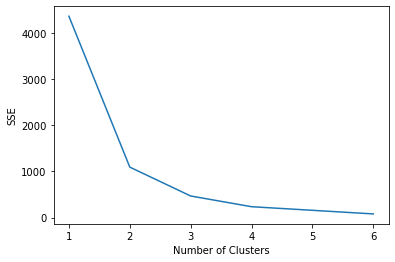

In [50]:
sse = []
for k in range(1,7):
    kmeans = KMeans(n_clusters = k,random_state=0).fit(c)
    sse.append(kmeans.inertia_)
plt.plot(range(1,7),sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [60]:
Kmeans = KMeans(n_clusters = 3,random_state = 0).fit(c)
print(type(Kmeans))
print(type(Kmeans.labels_))
f = pd.DataFrame(c)
f['group'] = Kmeans.labels_

<class 'sklearn.cluster._kmeans.KMeans'>
<class 'numpy.ndarray'>


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [52]:
print(pd.DataFrame(zip(Kmeans.labels_,a)))



      0  1
0     2  7
1     2  7
2     2  7
3     1  1
4     1  1
...  .. ..
1081  0  3
1082  0  3
1083  0  4
1084  0  4
1085  0  4

[1086 rows x 2 columns]


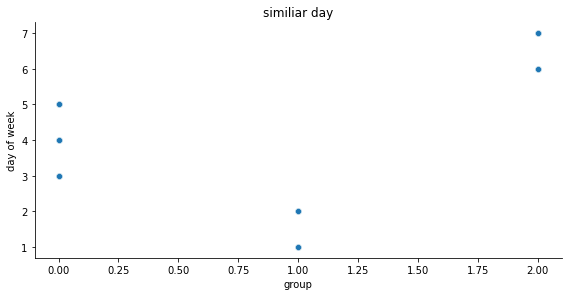

In [63]:
e = pd.DataFrame(zip(Kmeans.labels_,a))
grid = sns.relplot(data=e,
                   x=0,
                   y=1,
                   height=4,
                   aspect=2)
grid.set(xlabel = 'group',ylabel = 'day of week',title = 'similiar day')
plt.show()

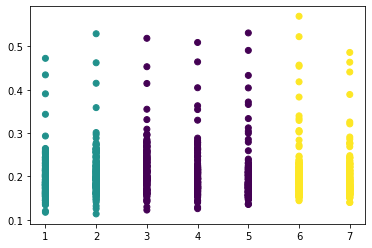

In [62]:
plt.scatter(f.iloc[:,0],f.iloc[:,1],c = f.iloc[:,2])
plt.show()